In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import binning

# Comment out the following line if needed
from tueplots import bundles
plt.rcParams.update(bundles.neurips2022())

# For mean squared error

In [3]:
max_n = 1000
factor_off_list = [1.0, 1.001, 1.01, 1.1, 1.4]

# Get evenly log-spaced n
base = 1.1
n = 2
n_vec = [n]
while True:
    n *= base
    n = math.ceil(n)
    if n >= max_n:
        break
    n_vec.append(n)
n_vec.append(max_n)
print(n_vec)

df = pd.DataFrame(columns=factor_off_list, index=n_vec)

for factor_off in factor_off_list:
    d = 2
    print(f"Doing factor_off={factor_off}")
    for n in n_vec:

        B = binning.bennett_matrix(n)
        target_error = factor_off * binning.get_mse(B, B)
        our_error = 1000 * target_error
        space = None
        while our_error > target_error :

            c = 1 - 1 / d

            L, R, space = binning.approx_bennett_mm(n, c=c, perform_extra_checks=True)
            our_error = binning.get_mse(L, R)
            if our_error > target_error:
                d += 1
            print(d, c)

        df.at[n, factor_off] = space
        print(f'n={n} done w/ space={space}!')

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19, 21, 24, 27, 30, 33, 37, 41, 46, 51, 57, 63, 70, 77, 85, 94, 104, 115, 127, 140, 154, 170, 188, 207, 228, 251, 277, 305, 336, 370, 408, 449, 494, 544, 599, 659, 725, 798, 878, 966, 1000]
Doing factor_off=1.0
0.0
2 0.5
n=2 done w/ space=2!
0.0
2 0.5
n=3 done w/ space=3!
0.0
2 0.5
n=4 done w/ space=4!
0.0
2 0.5
n=5 done w/ space=4!
0.0
2 0.5
n=6 done w/ space=4!
0.0
2 0.5
n=7 done w/ space=4!
2.220446049250313e-16
2 0.5
n=8 done w/ space=4!
2.220446049250313e-16
2 0.5
n=9 done w/ space=4!
2.220446049250313e-16
2 0.5
n=10 done w/ space=4!
2.220446049250313e-16
2 0.5
n=11 done w/ space=4!
2.220446049250313e-16
2 0.5
n=13 done w/ space=4!
2.220446049250313e-16
3 0.5
2.220446049250313e-16
3 0.6666666666666667
n=15 done w/ space=6!
4.349534337366016e-16
3 0.6666666666666667
n=17 done w/ space=6!
4.349534337366016e-16
3 0.6666666666666667
n=19 done w/ space=6!
4.580870084974346e-16
3 0.6666666666666667
n=21 done w/ space=6!
5.50827427185557e-16
3

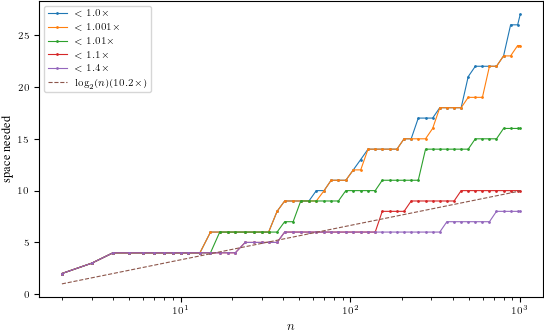

In [3]:
plt.figure()
for factor_off in df.columns:
    plt.plot(df.index, df[factor_off], label=f'$<{factor_off}\\times$', ls='-', marker='.', ms=2, lw=0.8)
plt.plot(df.index, np.log2(df.index), label='$\\log_2(n) (10.2\\times)$', ls='--', lw=0.8)
plt.xlabel('$n$')
plt.ylabel('space needed')
plt.legend()
plt.xscale('log')
plt.show()

In [4]:
N = 100
space_vec = []
approx_vec = []

ds = np.arange(2, 100, 1)
df = pd.DataFrame(index=ds, columns=['space', 'approx'])

B = binning.bennett_matrix(N)
baseline_mse = binning.get_mse(B, B)

for d in ds:

    c = 1 - 1 / d
    L, R, space = binning.approx_bennett_mm(N, c=c, perform_extra_checks=True)
    our_mse = binning.get_mse(L, R)

    df.at[d, 'approx'] = our_mse / baseline_mse
    df.at[d, 'space'] = space

    print(d, space)

2 6
3 8
4 10
5 12
6 13
7 14
8 16
9 18
10 20
11 20
12 21
13 22
14 24
15 24
16 25
17 26
18 28
19 28
20 29
21 30
22 32
23 32
24 33
25 34
26 35
27 35
28 36
29 37
30 38
31 38
32 39
33 40
34 41
35 41
36 42
37 43
38 44
39 44
40 45
41 46
42 47
43 47
44 48
45 49
46 50
47 50
48 51
49 52
50 52
51 52
52 53
53 54
54 54
55 54
56 55
57 56
58 56
59 56
60 57
61 58
62 58
63 58
64 59
65 60
66 60
67 60
68 61
69 62
70 62
71 62
72 63
73 64
74 64
75 64
76 65
77 66
78 66
79 66
80 67
81 68
82 68
83 68
84 69
85 70
86 70
87 70
88 71
89 72
90 72
91 72
92 73
93 74
94 74
95 74
96 75
97 76
98 76
99 76


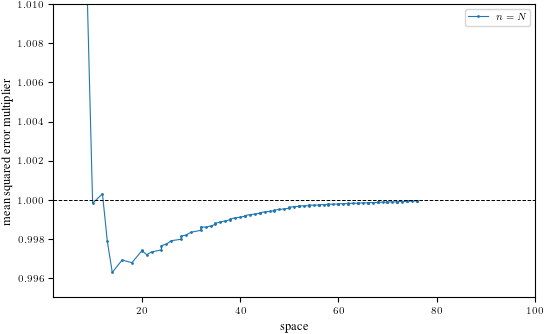

In [5]:
plt.figure()
plt.plot(df['space'], df['approx'], marker='.', ms=2, lw=0.8, label='$n={N}$')
plt.xlabel('space')
plt.ylabel('mean squared error multiplier')
plt.ylim([0.995, 1.01])
plt.xlim([2, 100])
plt.axhline(1.0, ls='--', lw=0.7, color='black')
plt.legend()
plt.show()

# For maximum square error

In [4]:
# max SE approximation
max_n = 1000
factor_off_list = [1.0, 1.001, 1.01, 1.1, 1.4]

base = 1.1
n = 2
n_vec = [n]
while True:
    n *= base
    n = math.ceil(n)
    if n >= max_n:
        break
    n_vec.append(n)
n_vec.append(max_n)
print(n_vec)

df = pd.DataFrame(columns=factor_off_list, index=n_vec)

for factor_off in factor_off_list:
    print(f"Doing factor_off={factor_off}")
    d = 2
    for n in n_vec:

        B = binning.bennett_matrix(n)
        target_error = factor_off * binning.get_max_se(B, B)
        our_error = 1000 * target_error
        space = None
        while our_error > target_error :

            c = 1 - 1 / d

            L, R, space = binning.approx_bennett_mm(n, c=c, perform_extra_checks=True)
            our_error = binning.get_max_se(L, R)
            if our_error > target_error:
                d += 1
            print(d, c)

        df.at[n, factor_off] = space
        print(f'n={n} done w/ space={space}!')

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19, 21, 24, 27, 30, 33, 37, 41, 46, 51, 57, 63, 70, 77, 85, 94, 104, 115, 127, 140, 154, 170, 188, 207, 228, 251, 277, 305, 336, 370, 408, 449, 494, 544, 599, 659, 725, 798, 878, 966, 1000]
Doing factor_off=1.0
2 0.5
n=2 done w/ space=2!
2 0.5
n=3 done w/ space=3!
2 0.5
n=4 done w/ space=4!
2 0.5
n=5 done w/ space=4!
2 0.5
n=6 done w/ space=4!
2 0.5
n=7 done w/ space=4!
2 0.5
n=8 done w/ space=4!
2 0.5
n=9 done w/ space=4!
2 0.5
n=10 done w/ space=4!
2 0.5
n=11 done w/ space=4!
2 0.5
n=13 done w/ space=4!
2 0.5
n=15 done w/ space=4!
2 0.5
n=17 done w/ space=4!
3 0.5
3 0.6666666666666667
n=19 done w/ space=6!
3 0.6666666666666667
n=21 done w/ space=6!
3 0.6666666666666667
n=24 done w/ space=6!
3 0.6666666666666667
n=27 done w/ space=6!
3 0.6666666666666667
n=30 done w/ space=6!
3 0.6666666666666667
n=33 done w/ space=6!
3 0.6666666666666667
n=37 done w/ space=6!
4 0.6666666666666667
4 0.75
n=41 done w/ space=9!
4 0.75
n=46 done w/ space=9!
4 

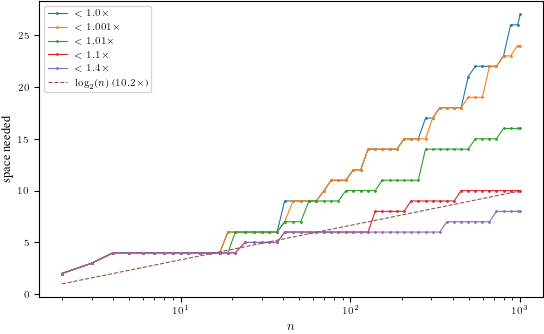

In [5]:
plt.figure()
for factor_off in df.columns:
    plt.plot(df.index, df[factor_off], label=f'$<{factor_off}\\times$', ls='-', marker='.', ms=2, lw=0.8)
plt.plot(df.index, np.log2(df.index), label='$\\log_2(n)$ ($10.2\\times$)', ls='--', lw=0.8)
plt.xlabel('$n$')
plt.ylabel('space needed')
plt.legend()
plt.xscale('log')
plt.show()

In [6]:
N = 100
space_vec = []
approx_vec = []

ds = np.arange(2, 100, 1)
df = pd.DataFrame(index=ds, columns=['space', 'approx'])

B = binning.bennett_matrix(N)
baseline_error = binning.get_max_se(B, B)

for d in ds:

    c = 1 - 1 / d
    L, R, space = binning.approx_bennett_mm(N, c=c, perform_extra_checks=True)
    our_error = binning.get_max_se(L, R)

    df.at[d, 'approx'] = our_error / baseline_error
    df.at[d, 'space'] = space

    print(d, space)

2 6
3 8
4 10
5 12
6 13
7 14
8 16
9 18
10 20
11 20
12 21
13 22
14 24
15 24
16 25
17 26
18 28
19 28
20 29
21 30
22 32
23 32
24 33
25 34
26 35
27 35
28 36
29 37
30 38
31 38
32 39
33 40
34 41
35 41
36 42
37 43
38 44
39 44
40 45
41 46
42 47
43 47
44 48
45 49
46 50
47 50
48 51
49 52
50 52
51 52
52 53
53 54
54 54
55 54
56 55
57 56
58 56
59 56
60 57
61 58
62 58
63 58
64 59
65 60
66 60
67 60
68 61
69 62
70 62
71 62
72 63
73 64
74 64
75 64
76 65
77 66
78 66
79 66
80 67
81 68
82 68
83 68
84 69
85 70
86 70
87 70
88 71
89 72
90 72
91 72
92 73
93 74
94 74
95 74
96 75
97 76
98 76
99 76


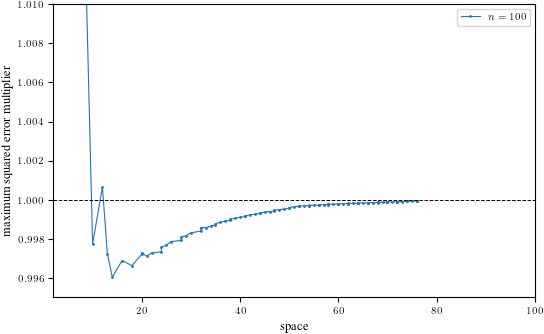

In [7]:
plt.figure()
plt.plot(df['space'], df['approx'], marker='.', ms=2, lw=0.8, label=f'$n={N}$')
plt.xlabel('space')
plt.ylabel('maximum squared error multiplier')
plt.ylim([0.995, 1.01])
plt.xlim([2, 100])
plt.axhline(1.0, ls='--', lw=0.7, color='black')
plt.legend()
plt.show()

# Show an example factorization we get

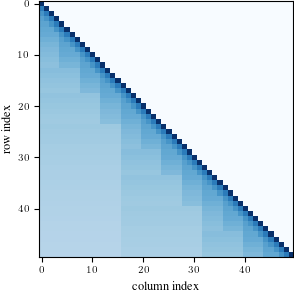

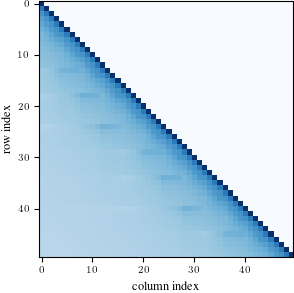

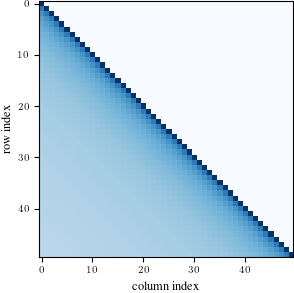

Our approximation: 0.99964534660313 in space 9
[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


In [8]:
n = 50
c = 0.75
L, R, our_space = binning.approx_bennett_mm(n, c=c)
B = binning.bennett_matrix(n)

plot_L, plot_R, plot_B = np.zeros((n,n)), np.zeros((n,n)), np.zeros((n,n))


# Only used for scaling colors in plot
exp = 0.5
for i in range(n):
    for j in range(n):
        plot_L[i, j] = L[i, j] ** exp
        plot_R[i, j] = R[i, j] ** exp
        plot_B[i, j] = B[i, j] ** exp


figsize=(3,3)
plt.figure(figsize=figsize)
plt.imshow(plot_L, cmap='Blues', interpolation='nearest')
plt.xlabel('column index')
plt.ylabel('row index')
plt.show()
plt.figure(figsize=figsize)
plt.imshow(plot_R, cmap='Blues', interpolation='nearest')
plt.xlabel('column index')
plt.ylabel('row index')
plt.show()
plt.figure(figsize=figsize)
plt.imshow(plot_B, cmap='Blues', interpolation='nearest')
plt.xlabel('column index')
plt.ylabel('row index')
plt.show()

print(f"Our approximation: {binning.get_mse(L, R) / binning.get_mse(B, B)} in space {our_space}")

print(L @ R)
print(B @ B)